In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sb
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
d=pd.read_csv("delivery_time.csv")

In [3]:
d.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
d.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [5]:
d.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Correlation

In [6]:
d.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

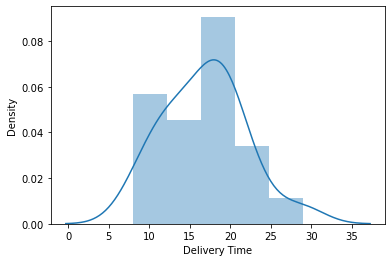

In [7]:
sb.distplot(d["Delivery Time"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

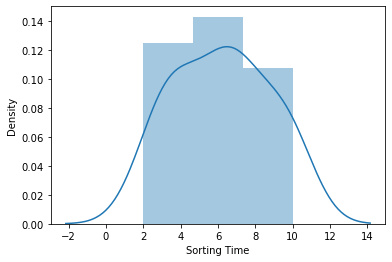

In [8]:
sb.distplot(d["Sorting Time"])

In [9]:
d.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
d.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

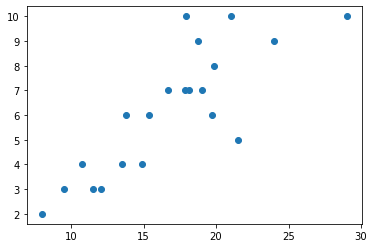

In [11]:
plt.scatter(x="Delivery Time",y="Sorting Time",data=d)

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

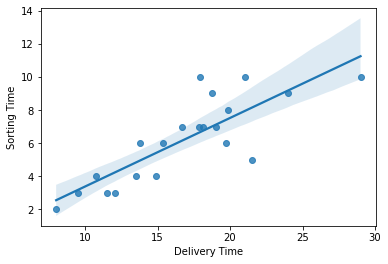

In [12]:
sb.regplot(x="Delivery Time",y="Sorting Time",data=d)

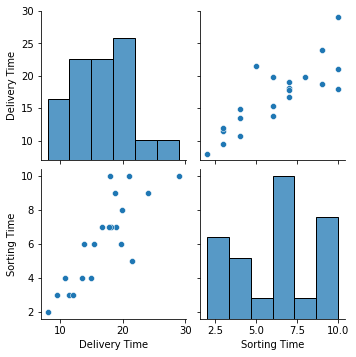

In [13]:
sb.pairplot(d)

In [14]:
d=d.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)

## Model Building and Model Training

In [15]:
import statsmodels.formula.api as smf

In [16]:
model = smf.ols("delivery_time~sorting_time",data=d).fit()

In [17]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

## As p value is much lessar than (0.5) we can say there is a good correlation between variables. 

## Model Testing

In [19]:
print(1.649020*4+6.582734)
print(1.649020*15+6.582734)

13.178814
31.318033999999997


## Machine Prediction

In [20]:
pred_data={"sorting_time":[1.1,2.3,3.5,7.4,11.5,12.7]}
pred_data

{'sorting_time': [1.1, 2.3, 3.5, 7.4, 11.5, 12.7]}

In [21]:
test_data=pd.DataFrame(pred_data)
test_data

,sorting_time
0,1.1
1,2.3
2,3.5
3,7.4
4,11.5
5,12.7


In [22]:
model.predict(test_data)

0     8.396656
1    10.375480
2    12.354304
3    18.785481
4    25.546463
5    27.525287
dtype: float64

In [25]:
test_data_a=pd.DataFrame(d,columns=["sorting_time"])
test_data_a.head(5)

,sorting_time
0,10
1,4
2,6
3,9
4,10


In [26]:
model.predict(test_data_a)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

## Model Deployment

In [27]:
from pickle import dump
from pickle import load

In [34]:
dump(model,open('model.pkl','wb'))

In [37]:
linear_read_model=load(open('model.pkl','rb'))

In [38]:
linear_read_model.predict(test_data)

0     8.396656
1    10.375480
2    12.354304
3    18.785481
4    25.546463
5    27.525287
dtype: float64